<center><h1>QBUS6860 - Visual Data Analytics</h1></center>

# Tutorial [] - Week []

Tasks:

1. Explore features (or characteristics) of time series
2. Manipulating dates
3. Calculation of variables over time
4. Moving from times series to categorical time periods


## Task [].  

We use the dataset of Australia Covid Case numbers to demonstrate the seveval points in visualising time series

### Step 1.  Import Packages and Data

In [9]:
import numpy as np
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

df=pd.read_csv(r'/Users/leesi/usyd/qbus6860/data/AustraliaCovidCase.csv') 
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
0,2020-01-25,4,0,0,0,0,0,0,0,0
1,2020-01-26,0,0,0,0,0,0,0,0,0
2,2020-01-27,1,0,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,0,0,0,0,0,0
4,2020-01-29,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
754,2022-02-17,59127,66,105258,60122,0,-61,1,1,0
755,2022-02-18,22376,40,89883,25983,0,-149,-16,-3,0
756,2022-02-19,19165,45,79118,22273,0,-91,-18,-6,0
757,2022-02-20,15298,33,66652,17806,0,-45,-6,-6,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       759 non-null    object
 1   confirmed  759 non-null    int64 
 2   deaths     759 non-null    int64 
 3   tests      759 non-null    int64 
 4   positives  759 non-null    int64 
 5   recovered  759 non-null    int64 
 6   hosp       759 non-null    int64 
 7   icu        759 non-null    int64 
 8   vent       759 non-null    int64 
 9   vaccines   759 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.4+ KB


We can quickly use <code>seaborn</code>'s <code>lineplot</code> to draw time series. Let us try it first. Clearly we will use <code>date</code> as x-axis and the <code>confirmed</code> number as the y-axis. 

<AxesSubplot:xlabel='date', ylabel='confirmed'>

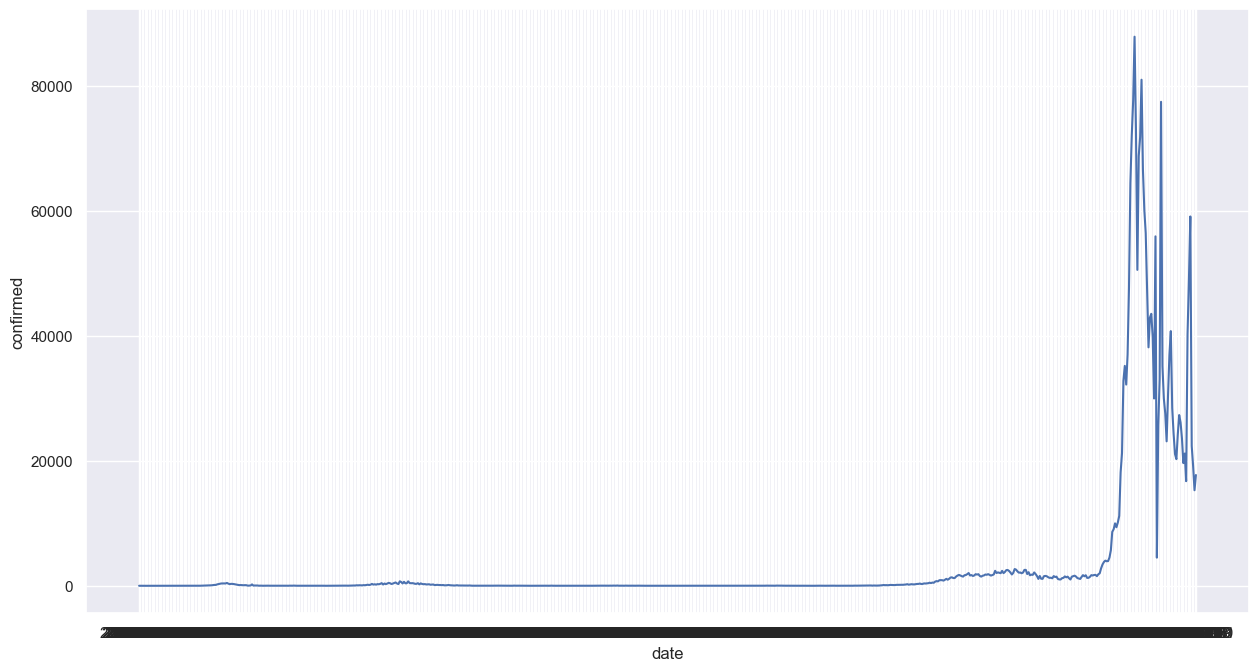

In [11]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'confirmed',data = df)

### Step 2.   Deal with Time (x-axis)

From the above plot, we have seen that it is hard to see the details of date. All the xticks labels are cluttered because the date string are too long and too many.  How could we improve this?

Basically <code>seaborn</code> has clever ways to selectly show x-axis tick labels. As the date information are text <code>string</code>, it is hard for <code>seaborn</code> to decide which labels (dates) should be drawn which should be discarded.  When x-axis is presented as numerical values, <code>seaborn</code> knows how to deal with. 

Clearly we know the information in <code>date</code> is time (dates), so we shall let <code>seaborn</code> know of this. <code>seaborn</code> knows how to deal with time.  This comes to the following code to convert text dates into actual time, which is called <code>datetime</code> object.

From the print out above, we know the text date is in the form of like 2020-01-25, so use the format argument to tell <code>pandas</code> how to explain the text date (at the moment to <code>pandas</code>, they are just strings).

In [12]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
0,2020-01-25,4,0,0,0,0,0,0,0,0
1,2020-01-26,0,0,0,0,0,0,0,0,0
2,2020-01-27,1,0,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,0,0,0,0,0,0
4,2020-01-29,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
754,2022-02-17,59127,66,105258,60122,0,-61,1,1,0
755,2022-02-18,22376,40,89883,25983,0,-149,-16,-3,0
756,2022-02-19,19165,45,79118,22273,0,-91,-18,-6,0
757,2022-02-20,15298,33,66652,17806,0,-45,-6,-6,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       759 non-null    datetime64[ns]
 1   confirmed  759 non-null    int64         
 2   deaths     759 non-null    int64         
 3   tests      759 non-null    int64         
 4   positives  759 non-null    int64         
 5   recovered  759 non-null    int64         
 6   hosp       759 non-null    int64         
 7   icu        759 non-null    int64         
 8   vent       759 non-null    int64         
 9   vaccines   759 non-null    int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 59.4 KB


If you compare this print out to the print right after load the data, it seems they are same. But internally <code>pandas</code> treat them as the actually time.  From the following code, you will see the difference:

<AxesSubplot:xlabel='date', ylabel='confirmed'>

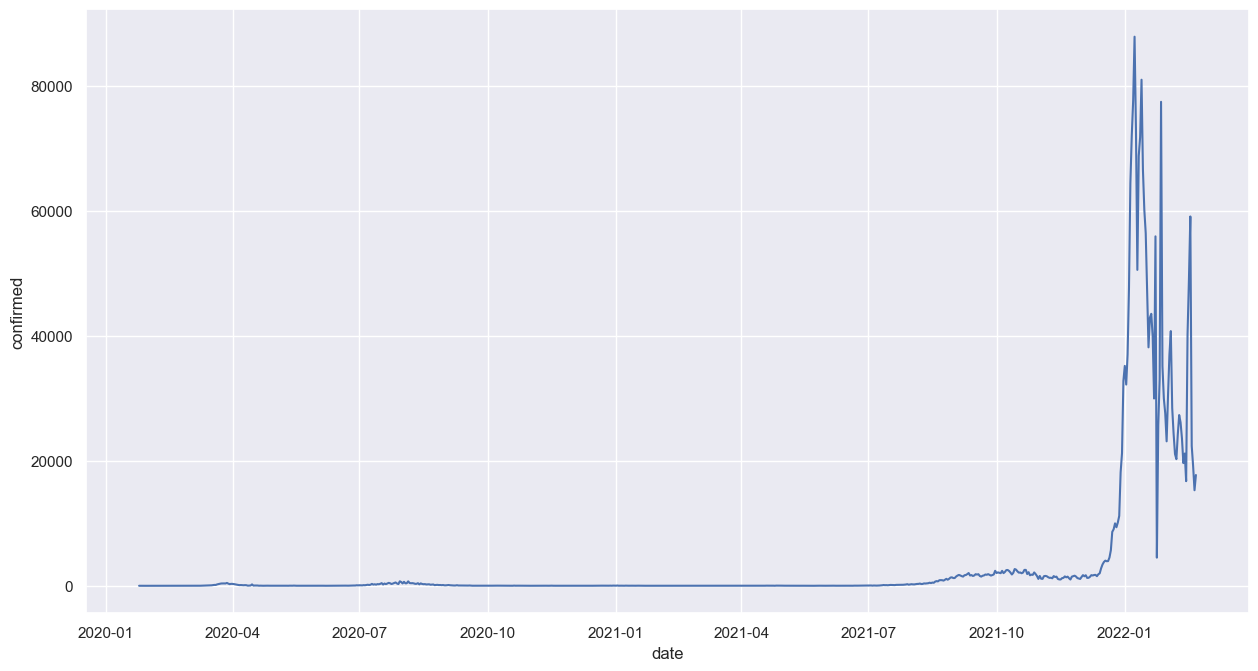

In [14]:
plt.figure(figsize = (15,8))
#sns.tsplot(data = df['Price'], time  = df['Date'])
sns.lineplot(x = 'date', y = 'confirmed',data = df)

This is much much better, we can see the x-axis tick labels as Year-Month in better time intervals.  

Do you think this is a good plot?   Probably it is not.  Actually from 2020-01 to 2021-07 the case number is too small. We may not see any details.  We wish to draw a time series before 2021-07.  Now given that <code>date</code> is in datetime, it is very easy to pick those dataframe rows before the time 2021-07.

In [15]:
df1 = df[df['date'] < pd.Timestamp(date(2021,7,1))]

<AxesSubplot:xlabel='date', ylabel='confirmed'>

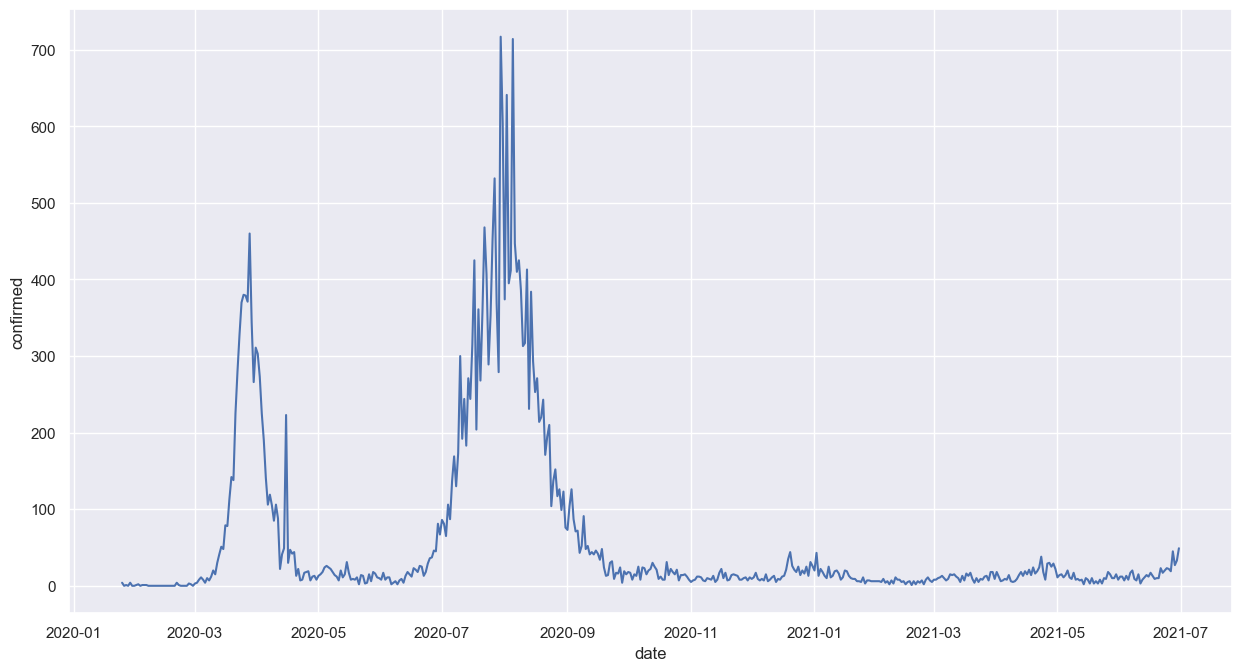

In [16]:
plt.figure(figsize = (15,8))
#sns.tsplot(data = df['Price'], time  = df['Date'])
sns.lineplot(x = 'date', y = 'confirmed',data = df1)

**Exercise:**  Can you draw the time series section after 2021-07?    Does the plot look better?  Any improvement?

<AxesSubplot:xlabel='date', ylabel='confirmed'>

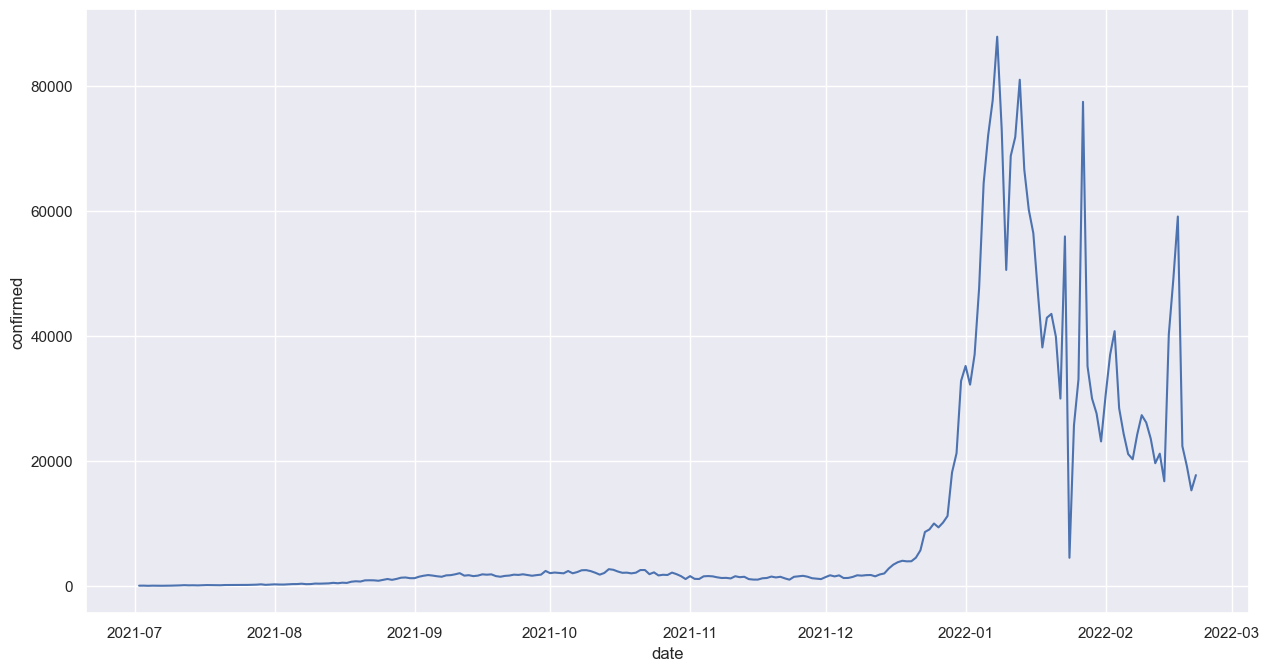

In [17]:
df2 = df[df['date'] > pd.Timestamp(date(2021,7,1))]

plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'confirmed', data = df2)

<hr style="border:1px solid gray"> <center><h1> To Remove </h1></center><hr style="border:1px solid gray">


## Task 3.  Simple Time Series Dashboard

### Step 1.  First, import the data

In [18]:
import numpy as np
import pandas as pd

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure, show

#import data

df=pd.read_csv(r'/Users/leesi/usyd/qbus6860/data/bitcoin.csv')
df.head()

,date,price
0,2020-08-08,11605.60
1,2020-08-09,11767.60
2,2020-08-10,11684.06
3,2020-08-11,11893.03
4,2020-08-12,11392.43


### Step 2.  Make the source as requested by <code>bokeh</code> 

In [19]:
dates = np.array(df['date'], dtype=np.datetime64)
source = ColumnDataSource(data=dict(date=dates, close=df['price']))

### Step 3.  Produce the dashboard

In [20]:
# Specify time period of interest using data
dates = np.array(df['date'], dtype=np.datetime64)
source = ColumnDataSource(data=dict(date=dates, close=df['price']))

# Create plot to present time series chart
p = figure(height=300, width=800, tools="xpan", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[1], dates[30]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Price'
p.xaxis.axis_label = 'Date'

# Create plot to enable selection of time period
select = figure(title="Drag the middle and edges of the selection box to change the range above",
                height=130, width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

# Add widget to select range of time
range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

# Connect widget action to plots
select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

show(column(p, select))

## Task 1: Working with waterfall chart.

Waterfall chart is a 2-dimensional plot, used to understanding the cumulative effects of sequentially added 
positive or negative values for a given variable.

This chart helps us to understand how an initial value is increased and decreased over time or over a series of intermediate steps.

The cumulative effects can be either time-based or category-based.

This type of plot is commonly used in financial analysis to understand how a particular value goes through gains and losses over time.

**Task:** use the data provided to map gains and losses of the company in 2020. Your graph should reflect the annual revenue progress 

Explain, what insights you have derived from the visualisation.

### Step 1. First, import the packages and data

In [1]:
import pandas as pd
import numpy as np
import waterfall_chart
import matplotlib.pyplot as plt
import waterfall_chart

#%matplotlib inline
plt.rcParams.update({'figure.figsize':(7.5,5), 'figure.dpi':100})

import pandas as pd
df=pd.read_csv(r'/Users/leesi/usyd/qbus6860/data/cfdata.csv')
df

,year,month,revenue,change
0,2020,January,500,500
1,2020,February,100,-400
2,2020,March,700,600
3,2020,April,350,-350
4,2020,May,50,-300
5,2020,June,800,750
6,2020,July,200,-600
7,2020,August,100,-100
8,2020,September,400,300
9,2020,October,300,-100


### Step 2.  Prepare data

Values of x and y-axis should be passed as parameters into the function. 

Let’s try to visualize a simple cash flow chart for whole year months.

Variable a will reflect months and will be displayed on the x axis

Variable b will reflect the change in revenue and will be displayed on the y axis

In [2]:
# Viewing df sorted in descending order of 'change'
df.iloc[df.change.abs().argsort()][::-1]

,year,month,revenue,change
5,2020,June,800,750
6,2020,July,200,-600
2,2020,March,700,600
0,2020,January,500,500
1,2020,February,100,-400
3,2020,April,350,-350
8,2020,September,400,300
4,2020,May,50,-300
10,2020,November,500,200
11,2020,December,600,100


In [3]:
# varying the sorted_value parameter 
a = df['month']
b = df['change']

### Step 3.  Draw waterfall chart

<module 'matplotlib.pyplot' from 'C:\\Users\\leesi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

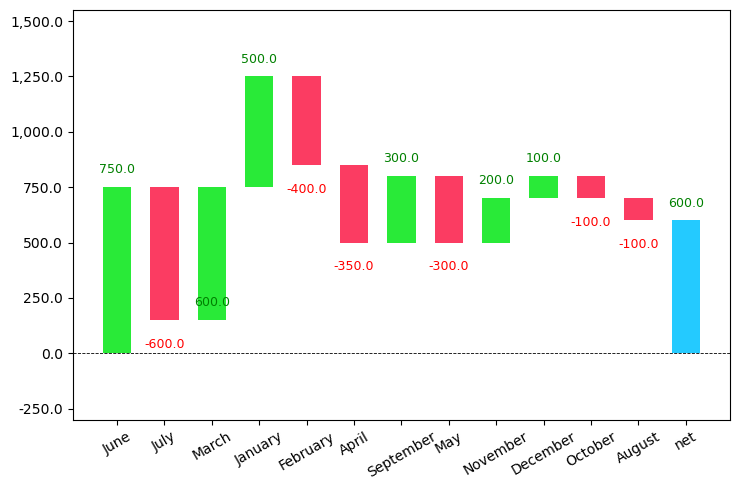

In [4]:
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True)

As you can see the values are sorted based on their absolute values in descending order.

This makes it easier to look at the graph

Second, we can use the net_label="" command to change the final column name which is set to default as "net".
rotation_value=90 can be used to rotate the x-axis names in vertical mode.

<module 'matplotlib.pyplot' from 'C:\\Users\\leesi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

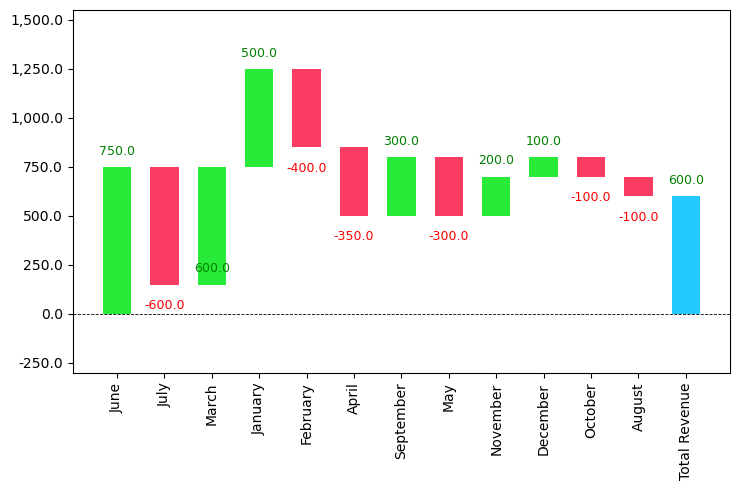

In [5]:
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True,
                     net_label='Total Revenue',
                     rotation_value=90)

Third, there is also another command threshold which groups  all contributions under a certain 
threshold to as a separate ‘other’ contribution.

If you set the value of the threshold to be 0.5, then it will take 0.5 of the maximum change as a cut off point, showing all other parts below the threshold in the "other" column.

You can also try thresholds greater or less than 0.5

<module 'matplotlib.pyplot' from 'C:\\Users\\leesi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

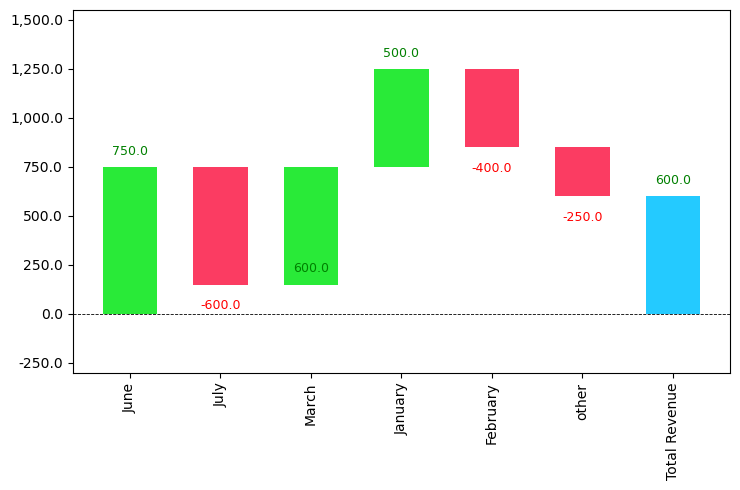

In [6]:
# When threshold value is 0.5 x 750 = 375
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True,
                     net_label='Total Revenue',
                     rotation_value=90,
                     threshold=0.5)

**Insight:** 
The largest increase in the revenue was in June, while the largest decline in revenue was in July.
Overall, the growth in the first half of the year was greater than that in the second part of the year.
It is important to investgate the sales in June, July and second half of the year to 
understand the relative decline in growth.

<module 'matplotlib.pyplot' from 'C:\\Users\\leesi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

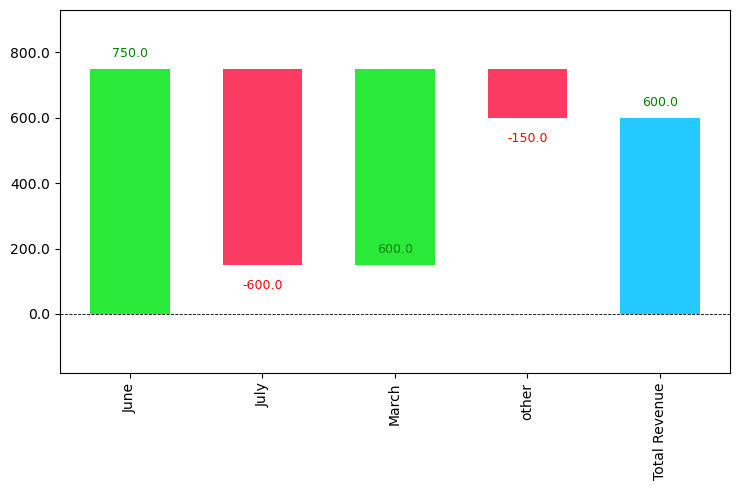

In [7]:
# When threshold value is 0.75 x 750 = 562.5
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True,
                     net_label='Total Revenue',
                     rotation_value=90,
                     threshold=0.75)

<module 'matplotlib.pyplot' from 'C:\\Users\\leesi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

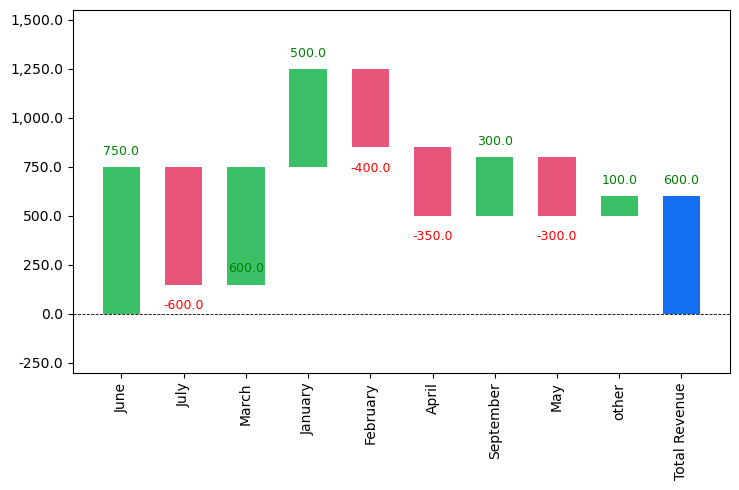

In [8]:
# When threshold value is 0.3 x 750 = 225 and changing colors using HEX code
waterfall_chart.plot(a, 
                     b,
                     sorted_value=True,
                     net_label='Total Revenue',
                     rotation_value=90,
                     threshold=0.3,
                     blue_color="#136fef",
                     green_color="#3ac167",
                     red_color="#e8557a")

<hr style="border:1px solid gray">